In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun
from wasserstein import Cluster
from numpy import array

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)
full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
base_time = full_data.DATE_TIME[len(full_data)-1]
xmin = -86.3283 
xmax =  -85.8942 
ymin = 39.6277 
ymax = 39.9277

In [3]:
def ESTProcess(mu, k0, w, T):
    p = pois(mu*T)
    times = np.random.uniform(0, T, p) #(low, high, size)
    counts = 0
    countf = p-1

    while(countf>=counts):
        p=pois(k0)    #each event generates p offspring according to a Poisson r.v. with parameter k0
        for j in range(0, p):
            temp=times[counts]-np.log(np.random.rand())/w    
            if(temp < T):    
                times = np.append(times, temp)
                countf=countf+1
        counts=counts+1

    times = times[0:countf]
    
    return times

def pois(S):
    if S <= 100:
        temp = -1*S
        L = exp(temp)
        k = 0
        p = 1
        while p > L:
            k = k + 1
            p = p * random()
        p = k - 1
    else:
        p = floor(S + sqrt(S) * random())
    return int(p)

In [4]:
mu = np.zeros([2,2])
theta_exact = .5
w_exact = .3
mu[0][0] = 1.00
mu[0][1] = .50
mu[1][0] = .25
mu[1][1] = .75
T = 1200
events = np.empty(3)
for x in range(0,2):
    for y in range(0,2):
        local_times = ESTProcess(mu[x][y], theta_exact, w_exact, T)
        for i in range(0, len(local_times)):
            local = array([x,y,local_times[i]])
            events = np.vstack((events, local))
events = events[1:]

In [5]:
events

array([[0.00000000e+00, 0.00000000e+00, 5.76938164e+02],
       [0.00000000e+00, 0.00000000e+00, 1.19101414e+03],
       [0.00000000e+00, 0.00000000e+00, 5.62216754e+02],
       ...,
       [1.00000000e+00, 1.00000000e+00, 4.52878751e+02],
       [1.00000000e+00, 1.00000000e+00, 4.53917926e+02],
       [1.00000000e+00, 1.00000000e+00, 4.57688793e+02]])

In [6]:
df_events = pd.DataFrame(np.zeros([len(events), 3]), columns = ['XCOORD', 'YCOORD', 'DATE_TIME'])
for i in range(0, len(events)):
    if events[i][0] == 0:
        x=xmin
    else:
        x=xmax
    if events[i][1] == 0:
        y=ymin
    else:
        y=ymax
    date_time=base_time + datetime.timedelta(days=events[i][2])
    df_events.at[i,'XCOORD']=x
    df_events.at[i,'YCOORD']=y
    df_events.at[i,'DATE_TIME']=date_time

In [7]:
df_events['DATE_TIME'] =  pd.to_datetime(df_events['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
df_events = df_events.sort_values(by='DATE_TIME')
df_events.reset_index(drop=True,inplace=True)
df_events

,XCOORD,YCOORD,DATE_TIME
0,-85.8942,39.9277,2016-11-01 07:02:10.295402
1,-86.3283,39.9277,2016-11-01 10:26:15.264962
2,-86.3283,39.9277,2016-11-01 12:12:48.386396
3,-85.8942,39.9277,2016-11-01 15:41:23.975430
4,-86.3283,39.6277,2016-11-01 18:57:48.054157
5,-86.3283,39.6277,2016-11-01 20:13:29.741944
6,-86.3283,39.6277,2016-11-01 23:58:05.494282
7,-86.3283,39.6277,2016-11-02 06:30:39.309824
8,-85.8942,39.6277,2016-11-02 11:27:42.031247
9,-85.8942,39.9277,2016-11-02 12:44:50.279184


In [9]:
np.seterr(divide = 'raise', over = 'raise', invalid = 'raise', under = 'raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [10]:
testing = PointProcessTrain(df_events, w = [10, .004, 1],final_param_save_loc = 'SyntheticTesting.npz', xgridsize = 2, ygridsize = 2, lam_memory=1000, track_granularity=10) 
testing.train()

0.1661405549094534 percent trained
0.3322811098189068 percent trained
0.49842166472836025 percent trained
0.6645622196378136 percent trained
0.8307027745472669 percent trained
0.9968433294567205 percent trained
1.1629838843661737 percent trained
1.3291244392756272 percent trained
1.4952649941850806 percent trained
1.6614055490945339 percent trained
1.8275461040039873 percent trained
1.993686658913441 percent trained
2.159827213822894 percent trained
2.3259677687323475 percent trained
2.492108323641801 percent trained
2.6582488785512544 percent trained
2.824389433460708 percent trained
2.9905299883701613 percent trained
3.1566705432796147 percent trained
3.3228110981890677 percent trained
3.4889516530985216 percent trained
3.6550922080079746 percent trained
3.821232762917428 percent trained
3.987373317826882 percent trained
4.153513872736335 percent trained
4.319654427645788 percent trained
4.485794982555242 percent trained
4.651935537464695 percent trained
4.818076092374148 percent tra

49.676025917926566 percent trained
49.84216647283602 percent trained
50.00830702774547 percent trained
50.17444758265492 percent trained
50.34058813756438 percent trained
50.506728692473835 percent trained
50.67286924738329 percent trained
50.83900980229274 percent trained
51.00515035720219 percent trained
51.171290912111644 percent trained
51.3374314670211 percent trained
51.50357202193055 percent trained
51.66971257684001 percent trained
51.83585313174947 percent trained
52.001993686658906 percent trained
52.16813424156837 percent trained
52.33427479647782 percent trained
52.500415351387275 percent trained
52.66655590629673 percent trained
52.83269646120618 percent trained
52.99883701611563 percent trained
53.164977571025084 percent trained
53.33111812593454 percent trained
53.497258680844 percent trained
53.66339923575345 percent trained
53.829539790662906 percent trained
53.99568034557235 percent trained
54.16182090048181 percent trained
54.32796145539126 percent trained
54.4941020

96.36152184748296 percent trained
96.52766240239242 percent trained
96.69380295730188 percent trained
96.85994351221133 percent trained
97.02608406712079 percent trained
97.19222462203024 percent trained
97.35836517693969 percent trained
97.52450573184915 percent trained
97.6906462867586 percent trained
97.85678684166805 percent trained
98.02292739657751 percent trained
98.18906795148695 percent trained
98.35520850639641 percent trained
98.52134906130587 percent trained
98.68748961621532 percent trained
98.85363017112478 percent trained
99.01977072603422 percent trained
99.18591128094369 percent trained
99.35205183585313 percent trained
99.51819239076258 percent trained
99.68433294567204 percent trained
99.8504735005815 percent trained


In [12]:
testing._mu

array([[1.15126167, 0.59506721],
       [0.3092065 , 0.78429946]])

In [13]:
testing._F

array([[[2.08684161e-03, 5.30868889e-02, 4.18418542e-01],
        [1.03719745e-02, 2.58150391e-02, 9.28811693e-01]],

       [[1.65747098e-46, 1.22683047e-02, 1.32046091e-05],
        [2.34657094e-02, 3.40640950e-02, 6.61889633e-01]]])

In [14]:
sum(testing._theta)

0.36220695766451494

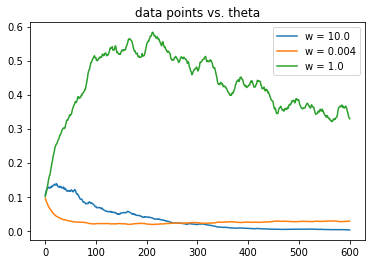


Sum of background rates w/o negative values: 2.839834836799216


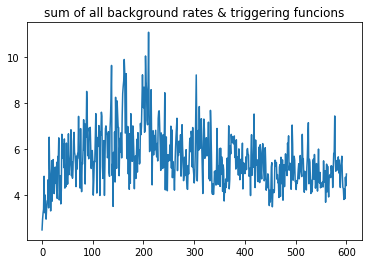

Hour vector sum: 
0.9999999999999991


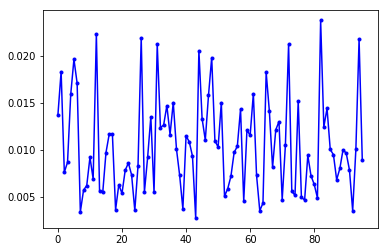

Day vector sum: 
1.0000000000001643


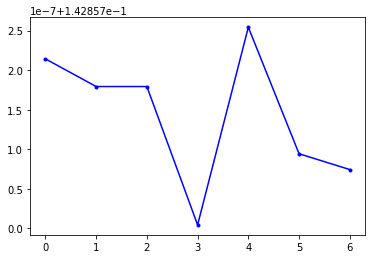

In [15]:
testing.param_examine()